## Overview


This project will teach you how to analyze data from `bike sharing` services 
and how to identify usage patterns depending on time features and weather 
conditions. Furthermore, you will apply concepts such as `visual analysis`, 
`hypothesis testing`, and `time series` analysis to the available data. By the 
end of this chapter, you should be able to work with time series data and 
apply some of the main data analysis techniques to business scenarios.

In this , we will analyze bike sharing data from Capital Bikeshare in 
Washington, D.C., USA, for the period between January 1, 2011, and December 31, 
2012. The data is aggregated on an hourly basis. This means that no initial and final 
locations of the individual rides are available, but only the total number of rides per 
hour. Nevertheless, additional meteorological information is available in the data, 
which could serve as a driving factor for identifying the total number of requests for a 
specific time frame (bad weather conditions could have a substantial impact on bike 
sharing demand).

The original dataset is available at [DataSet](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

## Understanding the Data
In this first part, we load the data and perform an initial exploration of it. 


In [3]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# load hourly data
hourly_data = pd.read_csv(r'E:\project\Data analysis _workshop\Bike_sharing\hour.csv')
hourly_data.head(30)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


A good practice is to check the **size** of the data we are loading, the number of **missing** 
values of each column, and some general **statistics** about the numerical columns:

In [4]:
# print some generic statistics about the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:{hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


In order to get some simple statistics on the numerical columns, such as the mean, 
standard deviation, minimum and maximum values, and their percentiles, we can use 
the **describe()** function directly on a pandas.Dataset object:

In [5]:
# get statistics on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Note that the `T` character after the describe() method gets the transpose of the 
resulting dataset, hence the columns become rows and vice versa.

According to the description of the original data, provided in the **Readme.txt file**, 
we can split the columns into three main groups:

* `temporal features`: This contains information about the time at which the 
record was registered. This group contains the **dteday, season, yr, mnth, hr, 
holiday, weekday, and workingday** columns.
* `weather related features`: This contains information about the weather 
conditions. **The weathersit, temp, atemp, hum, and windspeed** columns 
are included in this group.
* `record related features`: This contains information about the number 
of records for the specific hour and date. This group includes the **casual, 
registered**, and cnt columns

## Data Preprocessing


In this section, we perform some preprocessing steps, which will allow us 
to transform the data into a more human-readable format. Note that data 
preprocessing and wrangling is one of the most important parts of data analysis. In 
fact, a lot of hidden patterns and relationships might arise when data is transformed 
in the correct way. 
Furthermore, some machine learning algorithms might not even converge, or they 
may provide an erroneous result when fed with badly preprocessed data (a typical 
example of this is not scaling data in deep learning). In other cases, deriving insights 
from normalized data might be difficult for a human; therefore, it is good practice to 
transform the data before presenting the results.
In this use case, the data is already normalized and ready for analysis; nevertheless, 
some of its columns are hard to interpret from a human perspective. Before 
proceeding further, we will perform some basic transformations on the columns, 
which will result in a more easy-to-understand analysis at a later stage

### Exercise 1.01: Preprocessing Temporal and Weather Features 


In the first part of this exercise, we are going to `encode the temporal` features into 
a more human-readable format. The `seasons column` contains **values from 1 to 
4**, which encode, respectively, **the Winter, Spring, Summer, and Fall seasons**. 
The `yr column` contains the values **0 and 1 representing 2011 and 2012**, while the 
`weekday column` contains values from **0 to 6**, with each one representing a day 
of the week **(0: Sunday, 1: Monday, through to 6: Saturday)**. Furthermore, we 
scale the ``hum column`` to values between **0 and 100**(as it represents the humidity 
percentage), and the `windspeed column` to values between**0 and 67** (as those are 
the registered minimum and maximum wind speed): 


1. As a first step, create a copy of the original dataset. This is done as we do not 
want a specific transformation to affect our initial data:

In [6]:
# create a copy of the original data
preprocessed_data = hourly_data.copy()

2. In the next step, map the season variable from a numerical to a nicely encoded 
categorical one. In order to do that, we create a Python dictionary, which 
contains the encoding, and then exploit the apply and lambda functions

In [7]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

3. Create a Python dictionary for the yr column as well:


In [8]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

4. Create a Python dictionary for the weekday column:

In [9]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

Let's now proceed with encoding the weather-related columns **(weathersithum**, and **windspeed)**. According to the information provided by the data, 
the **weathersit** column represents the current weather conditions, where 
1 stands for clear weather with a few clouds, 2 represents cloudy weather, 
3 relates to light snow or rain, and 4 stands for heavy snow or rain. The hum
column stands for the current normalized air humidity, with values from 0 to 
1 (hence, we will multiply the values of this column by 100, in order to obtain 
percentages). Finally, the windspeed column represents the windspeed, which 
is again normalized to values between 0 and 67 m/s

5. Encode the weathersit values:

In [10]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

6. Finally, rescale the hum and windspeed columns:

In [11]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] *67

We can visualize the results from our transformation by calling the sample()
method on the newly created dataset:

In [12]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


As you can see from the output, the transformed features have categorial values 
instead of numerical ones. This makes the data more readable and allows certain 
pandas functions to correctly plot the data (as will be demonstrated later

Note that, in this exercise, we did not transform the **temp** and **atemp** columns (that 
is, the true and perceived temperatures, respectively). The reason for this is that they 
assume only positive values in the original dataset (hence, we do not know when 
the negative temperatures occurred). Furthermore, as their scales are different (the 
maximum value registered in the true temperature is 41 degrees, while the perceived 
one is 67), we do not want to modify their relations (that is, the hours at which the 
true temperature is greater than the perceived one and vice versa).

### Registered versus Casual Use Analysis


We begin our analysis of the single features by focusing on the two main ones: 
the number of rides performed by registered users versus the number of rides 
performed by non-registered (or casual) ones. These numbers are represented in the 
registered and casual columns, respectively, with the cnt column representing 
the sum of the registered and casual rides. We can easily verify the last statement for 
each entry in the dataset by using the assert statement:

In [13]:
"""
assert that total number of rides is equal to the sum of registered and 
casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), 'Sum of casual and registered rides not equal ''to total number of rides'

The first step in analyzing the two columns is to look at their distributions. A useful 
Python package that we will use extensively in this projects is seaborn. It is a data 
visualization library built on top of the standard matplotlib package, which 
provides a high-level interface for various statistical plots. In this way, the plots we 
present later will be both nicer and easier to produce. Let's start by visualizing the 
distribution of the registered and casual rides:

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rides distributions')

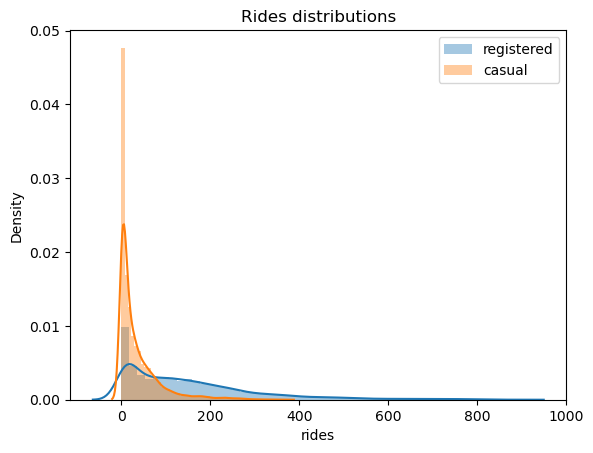

In [14]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
# plt.savefig('figs/rides_distributions.png', format='png')

 we can easily see that registered users perform way more rides than 
casual ones. Furthermore, we can see that the two distributions are skewed to the 
right, meaning that, for most of the entries in the data, zero or a small number of 
rides were registered (think, for example, of overnight rides). Finally, every entry in 
the data has quite a large number of rides (that is, higher than 800). 

* Let's now focus on the evolution of rides over time. We can analyze the number of 
rides each day with the following piece of code

Text(0, 0.5, 'number of rides per day')

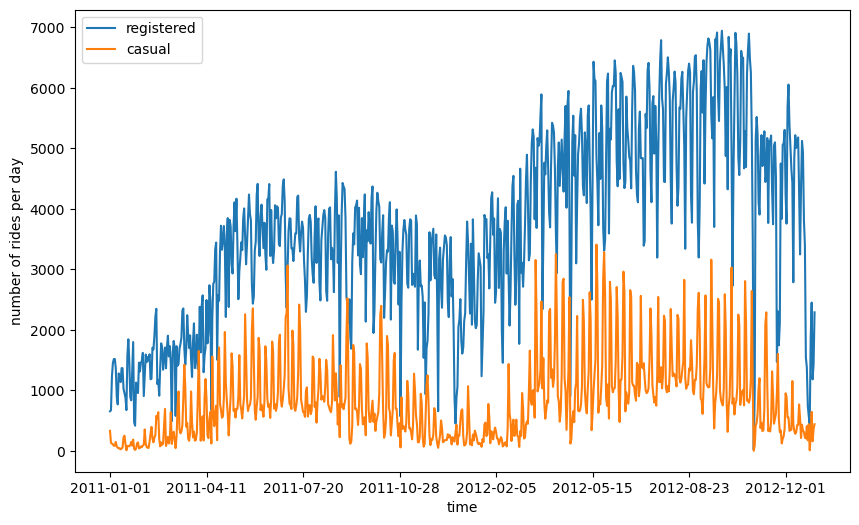

In [15]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
# plt.savefig('figs/rides_daily.png', format='png')

As you can see from the preceding figure, the number of registered rides is always 
above and significantly higher than the number of casual rides per day. Furthermore, 
we can observe that during winter, the overall number of rides decreases (which is 
totally in line with our expectations, as bad weather and low temperatures have a 
negative impact on ride sharing services). Note that there is quite a lot of variance in 
the time series of the rides in Figure 1.4. One way to smooth out the curves is to take 
the rolling mean and standard deviation of the two time series and plot those instead. 
In this way, we can visualize not only the average number of rides for a specific time 
period (also known as a **window**) but also the expected deviation from the mean:

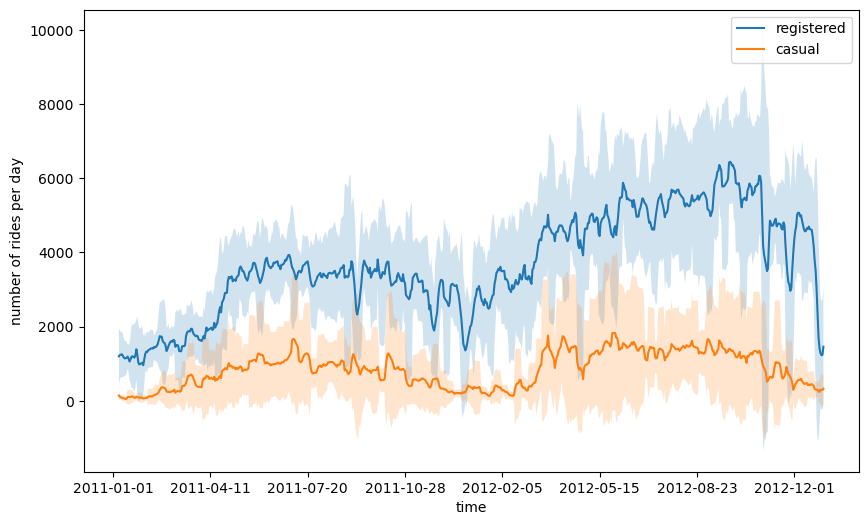

In [16]:
"""
Create new dataframe with necessary for plotting columns, and obtain 
number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling 
means, then we color the zone between the series of rolling means +- 2 
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'], rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
# plt.savefig('figs/rides_aggregated.png', format='png')

In order to compute the rolling statistics (that is, the mean and standard deviation), 
we use the **rolling()** function, in which we use **mean()** and **std()** to compute 
the rolling mean and standard deviation, respectively. This is a handy way to compute 
rolling statistics on time series, in which only recent entries account for computing 
them. In other words, the value of the rolling mean (or the standard deviation) at a 
certain time instance is only computed from the last window entries in the time series 
(in our case, this is 7), and not from the entries of the whole series.
Let's now focus on the distributions of the requests over separate hours and days of 
the week. We would expect certain time patterns to arise, as bike requests should be 
more frequent during certain hours of the day, depending on the day of the week. 
This analysis can be easily done by leveraging various functions from the seaborn
package, as shown in the following code snippet

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


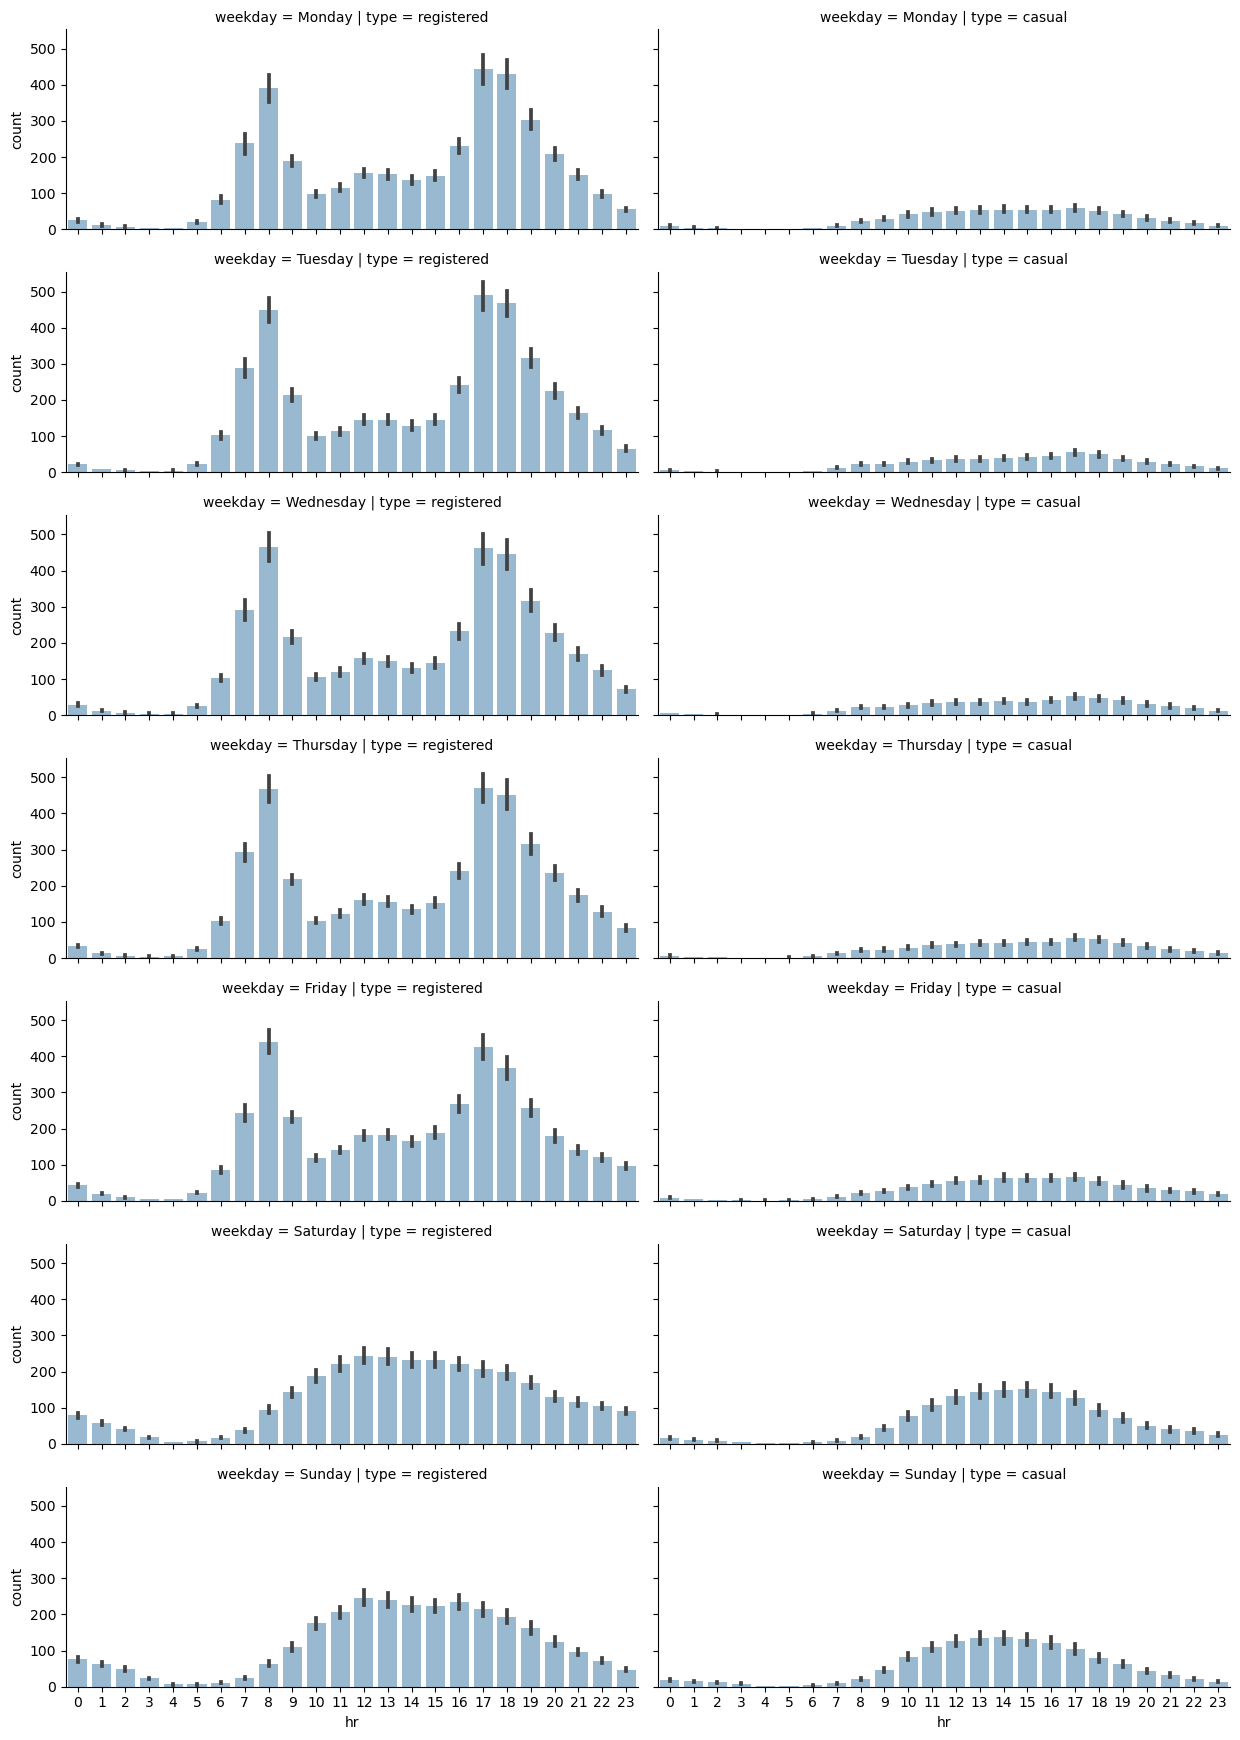

In [17]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

"""
transform the data into a format, in number of entries are computed as 
count, 
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""

grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
# grid.savefig('figs/weekday_hour_distributions.png', format='png')


* The seaborn.FacetGrid() function will create a new grid of plots, with rows 
corresponding to the different days of the week and columns corresponding to the 
types. Finally, the map() function is applied to each element of the grid, creating the 
respective plots. The produced plot is shown in Figure. We can immediately note 
that on working days, the highest number of rides for registered users takes place 
around 8 AM and at 6 PM. This is totally in line with our expectations, as it is likely that 
most registered users use the bike sharing service for commuting. On the other hand, 
the casual usage of bike sharing services on working days is quite limited, as the 
plot shows.

* During the weekend, we can see that ride distributions change for both casual and 
registered users. Still, registered rides are more frequent than casual ones, but both 
the distributions have the same shape, almost uniformly distributed between the 
time interval of 11 AM to 6 PM.

* As a `conclusion`, we could claim that most of the usage of bike sharing services occurs 
during working days, right before and right after the standard working time (that is, 9 
to 5)

### Exercise 1.02: Analyzing Seasonal Impact on Rides

In this exercise, we will investigate the impact of the different seasons on the total 
number of rides. Our goal is to create grid plots, similar to the one in Figure 1.6, in 
which the number of rides will be distributed over hours and weekdays, based on the 
current season. This exercise is a continuation of Exercise 1.01, Preprocessing Temporal 
and Weather Features

1. Start by combining the hours and seasons. Create a subset of the initial data by selecting the hr, **season, registered, and casual** columns:

In [18]:
# select subset of the data
plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]

2. Next, unpivot the data from wide to long format:

In [19]:
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')

3. Define the seaborn FacetGrid object, in which rows represent the different seasons:

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


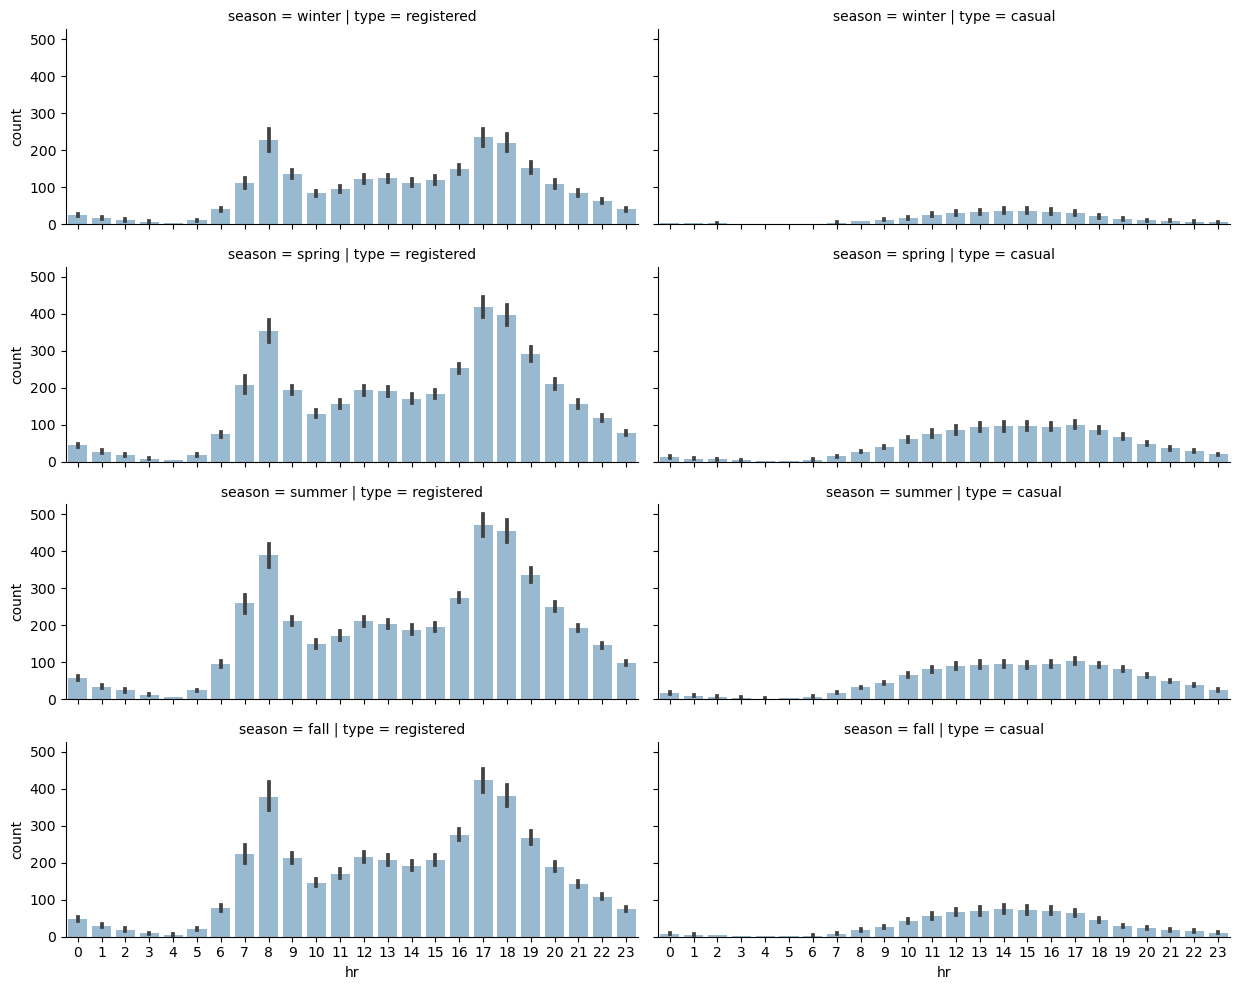

In [20]:
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, row_order=['winter', 'spring', 'summer', 'fall'])
# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
# save figure
# grid.savefig('figs/exercise_1_02_a.png', format='png'

As can be seen in the plot, while each season has a similar graph shape, the 
count is lower for the winter graph. So there are fewer rides (registered and 
casual) during winter. This makes sense, as fewer rides are likely to occur when 
the weather conditions are poor. 
* For the second part of the exercise (the distribution of rides on a weekday basis), 
we proceed just as we did in the first part

4. First, create a subset of the initial preprocessed data, containing only the relevant columns (weekday, season, registered, and casual):

In [21]:
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]

5. Again unpivot the data from wide to long format, but this time use weekday and season as grouping variables:

In [22]:
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')


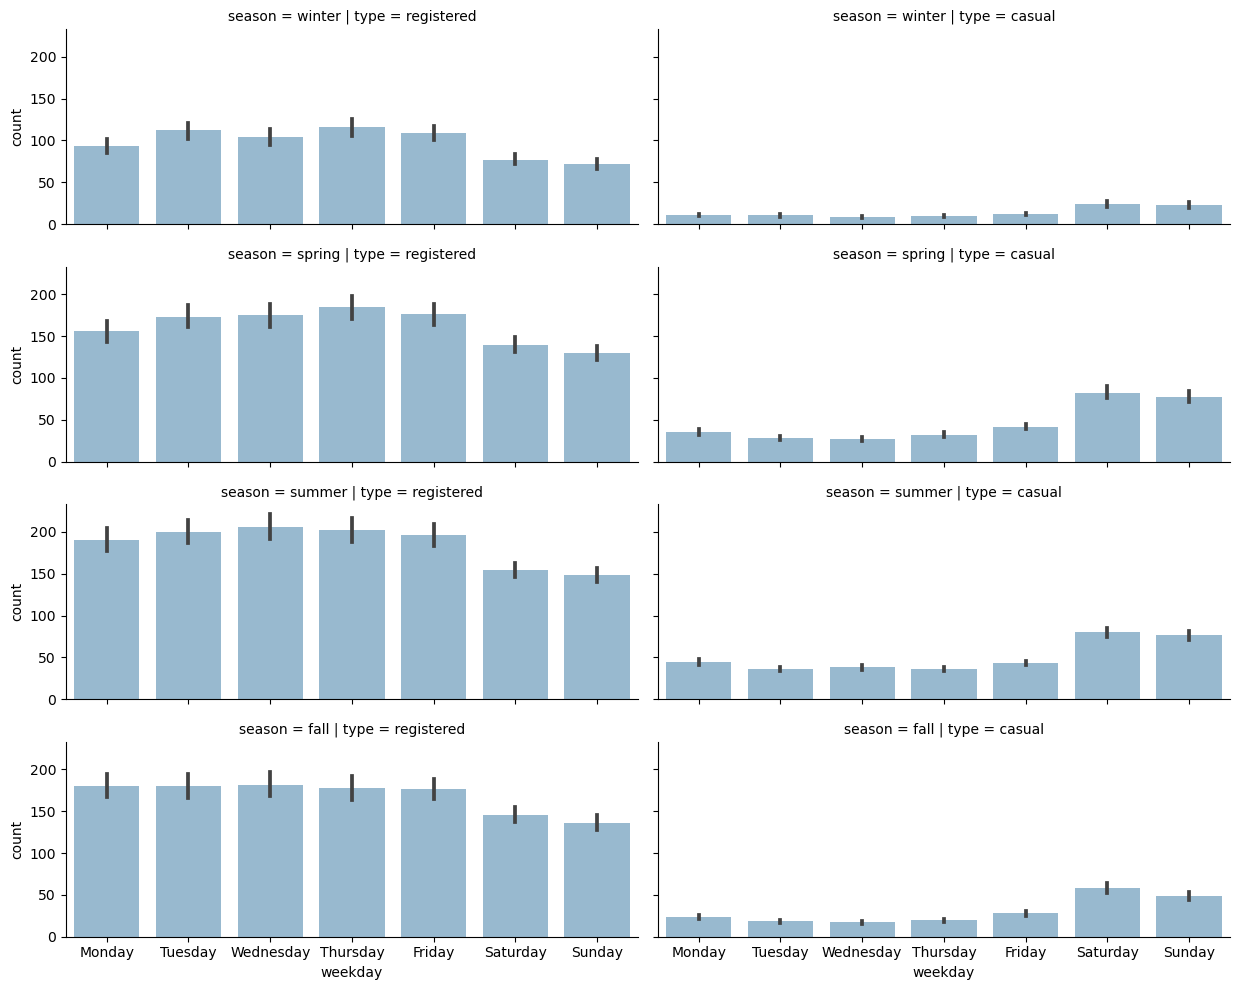

In [23]:
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

An interesting pattern occurs from the analysis conducted in Exercise 1.02, Analyzing 
Seasonal Impact on Rides. There is a decreasing number of registered rides over 
the weekend (compared to the rest of the week), while the number of casual rides 
increases. This could enforce our initial hypothesis, that is, that registered customers 
mostly use the bike sharing service for commuting (which could be the reason for the 
decreasing number of registered rides over the weekend), while casual customers 
use the service occasionally over the weekend. Of course, such a conclusion cannot 
be based solely on plot observations but has to be backed by statistical tests, which is 
the topic of our next section

### Exercise 1.03: Estimating Average Registered Rides


In this exercise, we will show how to perform hypothesis testing on our bike sharing 
dataset. This exercise is a continuation of Exercise 1.02, Analyzing Seasonal Impact 
on Rides:

1. Start with computing the average number of registered rides per hour. Note 
that this value will serve in formulating the null hypothesis because, here, you 
are explicitly computing the population statistic—that is, the average number 
of rides. In most of the cases, such quantities are not directly observable and, in 
general, you only have an estimation for the population statistics:

In [24]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

2. Suppose now that you perform certain measurements, trying to estimate the 
true average number of rides performed by registered users. For example, 
register all the rides during the summer of 2011 (this is going to be your sample):

In [25]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)].registered

3. Specify the significance level. A standard value is 0.05 (that is, when performing 
the statistical test), if the p-value obtained by the statistical test is less than 0.05, 
you can reject the null hypothesis by at least 95%. The following code snippet 
shows you how to do that:

In [26]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, \
p-value: {test_result[1]}")

Test statistic: -3.4919691483786197, p-value: 0.0004887645279519505


The result of the previous test returns a p-value smaller than 0.001, which is less 
than the predefined critical value. Therefore, you can reject the null hypothesis 
and assume that the alternative hypothesis is correct.

* Note that you have to make an important observation here: You computed the 
average number of rides on the true population; therefore, the value computed 
by the statistical test should be the same. So why have you rejected the null 
hypothesis? The answer to that question lies in the fact that your sample is not 
a true representation of the population, but rather a biased one. In fact, you 
selected only entries from the summer of 2011. Therefore, neither data from the 
full year is present, nor entries from 2012.

4. In order to show how such mistakes can compromise the results of statistical 
tests, perform the test again, but this time taking as a sample 5% of the 
registered rides (selected randomly). The following code snippet performs that:

In [27]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.6198071356892336, p-value: 0.5355474362198658


This time, the computed p-value is equal to **0.69**, which is much larger than the critical 
0.05, and so, you cannot reject the null hypothesis.

### Exercise 1.04: Hypothesis Testing on Registered Rides


In this exercise, we will be performing a hypothesis on registered rides. This exercise 
is a continuation of Exercise 1.03, Estimating Average Registered Rides:

1. First, formulate the null hypothesis. As mentioned earlier, you are interested 
in identifying whether there is a statistically significant difference between 
registered rides during working days and the weekend. Therefore, our null 
hypothesis is that the average number of rides for registered users during 
working days is the same as the average number of rides during the weekend. In 
other words:
* H_0 : average registered rides over weekdays-average registered rides over 
weekend=0
and 
* H_a : average registered rides over weekdays-average registered rides over 
weekend≠0


2. Once the null hypothesis is established, collect data for the two groups. This is 
done with the following code snippet

In [28]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)
# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

3. Perform the two-sample t-tests by using the scipy.stats.
ttest_ind function:

In [29]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


The resulting p-value from this test is less than 0.0001, which is far below the 
standard critical 0.05 value. As a conclusion, we can reject the null hypothesis 
and confirm that our initial observation is correct: that is, there is a statistically 
significant difference between the number of rides performed during working 
days and the weekend

4. Plot the distributions of the two samples:

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Registered rides distributions')

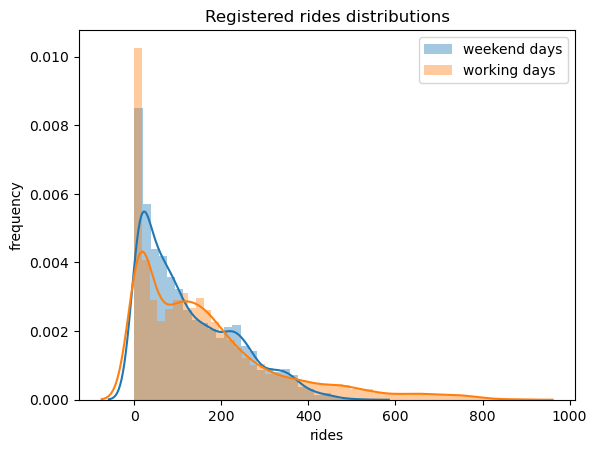

In [30]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
# plt.savefig('figs/exercise_1_04_a.png', format='png')

5. Perform the same type of hypothesis testing to validate the second assumption 
from the last section— that is, casual users perform more rides during the 
weekend. In this case, the null hypothesis is that the average number of rides 
during working days is the same as the average number of rides during the 
weekend, both performed only by casual customers. The alternative hypothesis 
will then result in a statistically significant difference in the average number of 
rides between the two groups: 

Statistic value: 41.077, p-value: 0.000


c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Casual rides distributions')

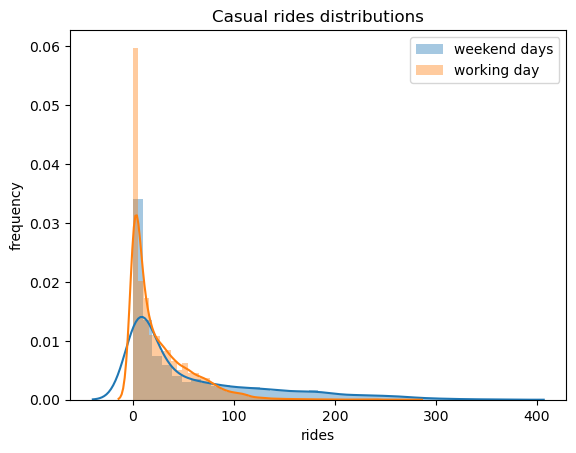

In [31]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working day')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
# plt.savefig('figs/exercise_1_04_b.png', format='png')

The p-value returned from the previous code snippet is 0, which is strong 
evidence against the null hypothesis. Hence, we can conclude that casual 
customers also behave differently over the weekend (in this case, they tend to 
use the bike sharing service more) as seen in the following figure:

`In conclusion, we can say that there is a statistically significant difference between  the number of rides on working days and weekend days for both casual and registered customers.` 

## Analysis of Weather-Related Features


Let's now focus on an analysis of the group of features representing the weather 
conditions. Our expectation is to observe a strong dependency of those features on 
the current number of rides, as bad weather can significantly influence bike 
sharing services

The weather features we identified earlier are the following:
* `weathersit`: This is a categorical variable representing the current weather 
situation. We encoded this variable with the following four values ![image.png](withersit.PNG)

• `temp`: This is the normalized temperature in Celsius. Values are divided by 
41, which means that the highest registered temperature in the data is 41°C 
(corresponding to 1 in our dataset).

• `atemp`: The normalized feeling temperature in Celsius. Values are divided by 
50, which means that the highest registered temperature in the data is 50°C 
(corresponding to 1 in our dataset).

•`hum`: The humidity level as a percentage.

• `windspeed`: The wind speed in m/s. 

From the provided descriptions, we can see that most of the weather-related features 
assume continuous values (except for weathersit). Furthermore, as both our 
variables of interest (the casual and registered number of rides) are also 
continuously distributed, the first and most common way to measure the relationship 
between two different continuous variables is to measure their correlation.


Let's provide a practical example on computing the correlation between two 
variables. As we want to compare several variables, it makes sense to define a 
function that performs the analysis between the variables, as we want to follow the 
Don't Repeat Yourself principle (commonly known as DRY)

In [37]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05},label=f"Registered rides (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05}, label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
        ax.set_ylabel("rides")
        ax.set_title(f"Correlation between rides and {col}")
        return ax

Applying the previously defined function to the four columns (temp, atemp, hum, 
and windspeed) returns the following figure:

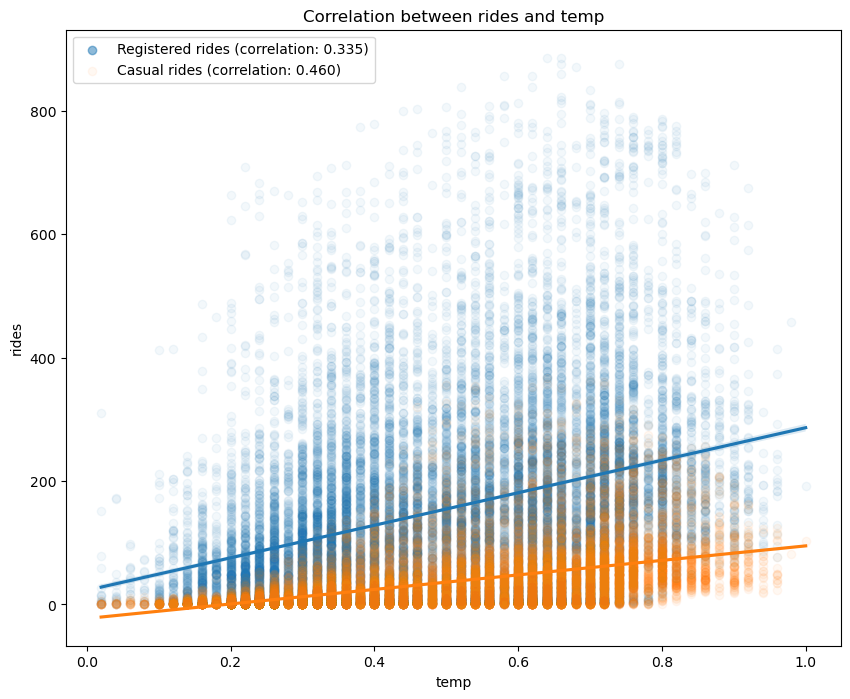

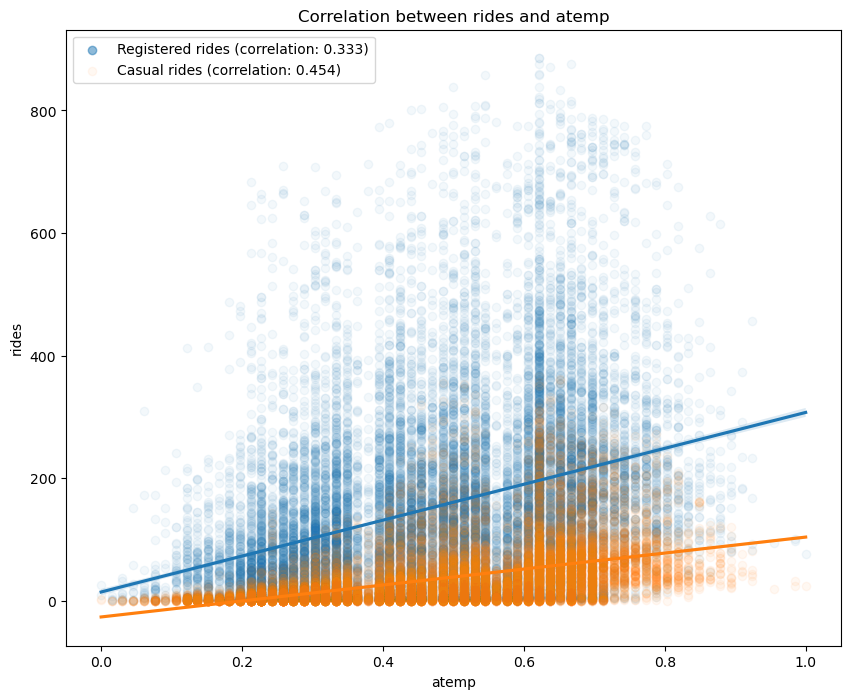

In [38]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
# plt.savefig('figs/correlation_temp.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
# plt.savefig('figs/correlation_atemp.png', format='png')

Now plot the correlation between the rides and hum, windspeed
features separately:

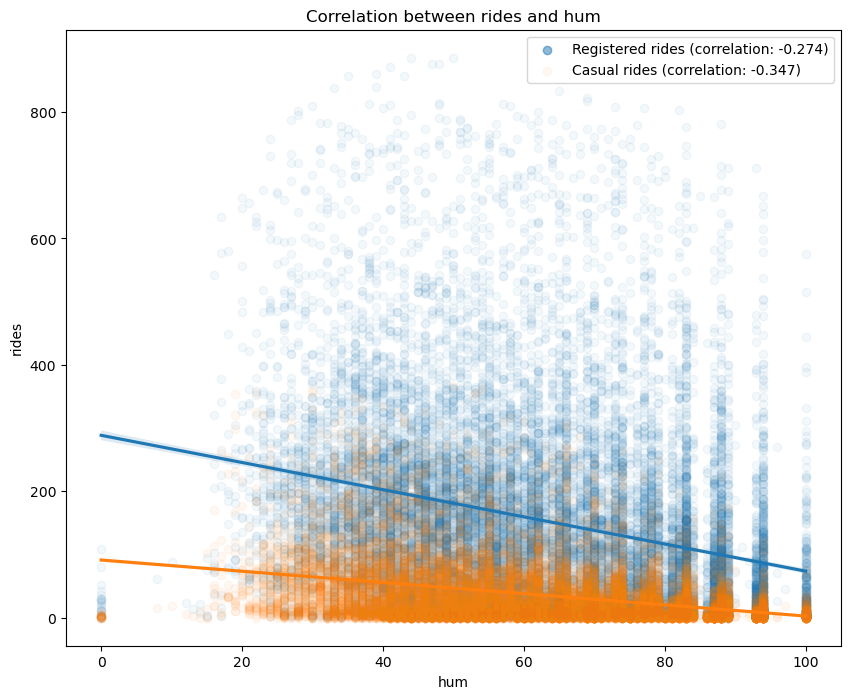

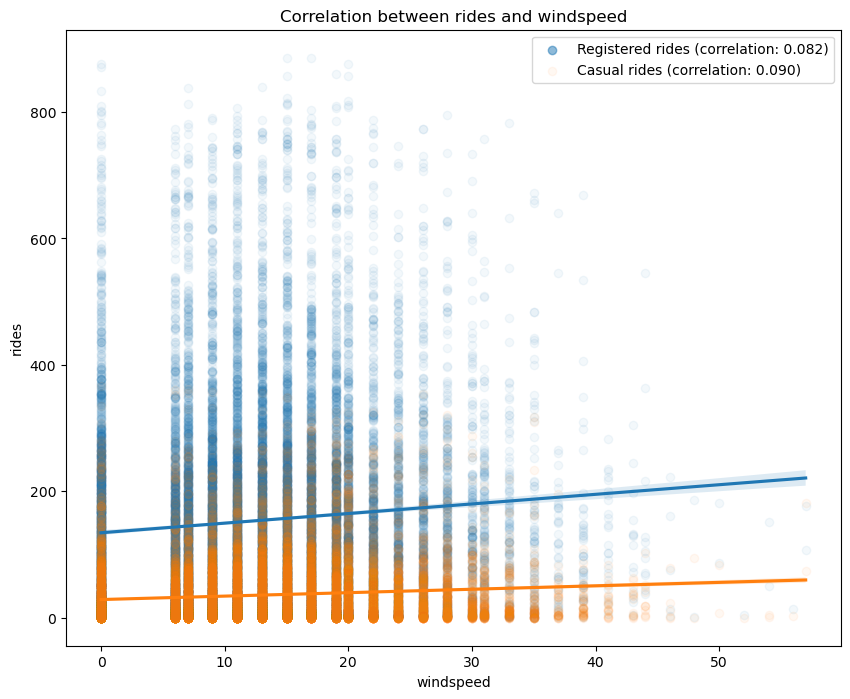

In [39]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
# plt.savefig('figs/correlation_hum.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
# plt.savefig('figs/correlation_windspeed.png', format='png')

we can observe that higher temperatures have a positive impact 
on the number of rides (the correlation between registered/casual rides and temp is 
0.335 and 0.46, respectively, and it's a similar case for atemp). Note that as the values 
in the registered column are widely spread with respect to the different values 
in temp, we have a lower correlation compared to the casual column. The same 
pattern can be observed in Figure , in which the humidity level has a negative 
correlation with both types of rides (-0.274 for registered and -0.347 for casual). 
This means that with a high level of humidity (mist or rain), customers will tend not 
to use the bike sharing service. From Figure 1.22, we can see that there is minimal 
correlation between the number of rides and the wind speed (a weak 
positive correlation)

One of the major drawbacks of the correlation coefficient is its assumption of a linear 
relationship between the two random variables. This is quite a strong assumption as, 
most of the time, relationships in nature are not linear. A measure that generalizes 
the Pearson's correlation to monotonic relationships between two variables is the 
Spearman rank correlation.
* Let's illustrate the difference between the two measures in the following example.


### Exercise 1.05: Evaluating the Difference between the Pearson and Spearman Correlations

Now return to the bike sharing data and investigate the relationship between 
the different variables in light of the difference between the two correlation 
measures. Define a function that, on the provided data and column, computes 
the Pearson and Spearman correlation coefficients with the registered and 
casual rides

In [40]:
# define function for computing correlations
from scipy.stats import pearsonr, spearmanr

def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,"Spearman (registered)": spearman_reg,"Pearson (casual)": pearson_cas,"Spearman (casual)": spearman_cas})

In [41]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)","Pearson (casual)","Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


As we can observe, for most of the variables, the Pearson and Spearman correlation 
coefficient are close enough (some non-linearity is to be expected). The most striking 
difference between the two coefficients occurs when comparing the temp (and 
atemp) and casual columns. More precisely, the Spearman correlation is quite 
high, meaning that there is significant evidence for a nonlinear, relatively strong and 
positive relationship. 

An interpretation of this result is that casual customers are far keener on using the 
bike sharing service when temperatures are higher. We have already seen from our 
previous analysis that casual customers ride mostly during the weekend, and they 
do not rely on bike sharing services for commuting to work. This conclusion is again 
confirmed by the strong relationship with temperature, as opposed to registered 
customers, whose rides have a weaker correlation with temperature.

#### Correlation Matrix Plot


A useful technique when performing a comparison between different continuous 
features is the correlation matrix plot. It allows the analyst to quickly visualize any 
possible relationships between the different features and identify potential clusters 
with highly correlated features.

* The next code snippet does that

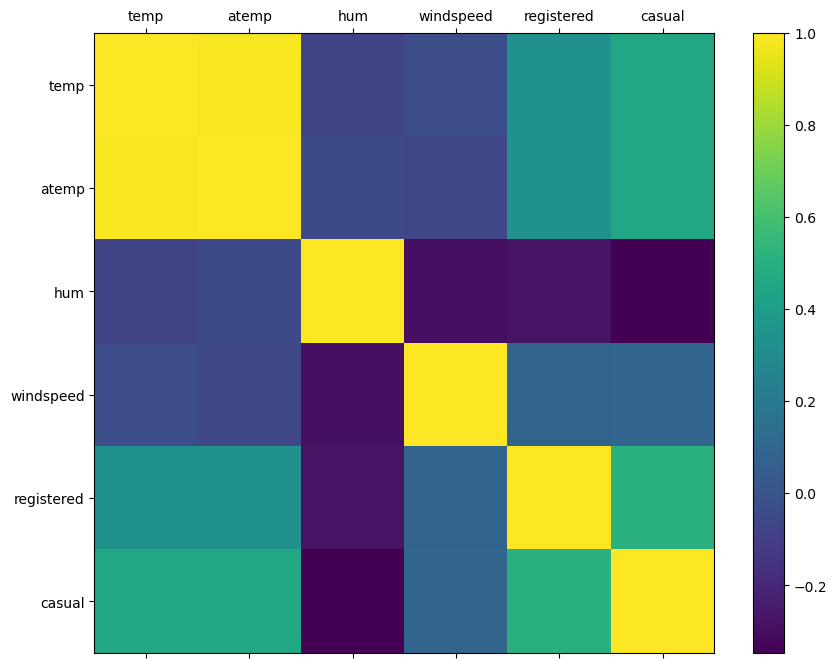

In [58]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10,8))
# sns.heatmap(corr, vmax=1, vmin=-1, annot=True)
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
plt.show()
# fig.savefig('figs/correlations.png', format='png')